# ECE580B9 Assignment 3

In [132]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import time
import random
import math as mat

In [95]:
def mesh():   
    G = nx.Graph()
    G.clear()

    for i in range(1, 9):
        G.add_node(i, pos=(i, 8))
    for i in range(9, 17):
        G.add_node(i, pos=(i-8, 7))
    for i in range(17, 25):
        G.add_node(i, pos=(i-16, 6))
    for i in range(25, 33):
        G.add_node(i, pos=(i-24, 5))
    for i in range(33, 41):
        G.add_node(i, pos=(i-32, 4))
    for i in range(41, 49):
        G.add_node(i, pos=(i-40, 3))
    for i in range(49, 57):
        G.add_node(i, pos=(i-48, 2))
    for i in range(57, 65):
        G.add_node(i, pos=(i-56, 1))

    for i in range(1, 64):
        if i == 1:
            G.add_edges_from([(1, 2), (1, 9)])

        elif i == 8:
            G.add_edges_from([(8, 7), (8, 16)])

        elif i == 57:
            G.add_edges_from([(57, 49), (57, 58)])

        elif i == 64:
            G.add_edges_from([(64, 63), (64, 56)])

        elif i == 2:
            G.add_edges_from([(2, 1), (2, 3), (2, 10)])

        elif i == 3:
            G.add_edges_from([(3, 2), (3, 4), (3, 11)])

        elif i == 4:
            G.add_edges_from([(4, 3), (4, 5), (4, 12)])

        elif i == 5:
            G.add_edges_from([(5, 4), (5, 6), (5, 13)])

        elif i == 6:
            G.add_edges_from([(6, 5), (6, 7), (6, 14)])

        elif i == 7:
            G.add_edges_from([(7, 6), (7, 8), (7, 15)])

        elif i == 9:
            G.add_edges_from([(9, 1), (9, 10), (9, 17)])

        elif i == 17:
            G.add_edges_from([(17, 9), (17, 18), (17, 25)])

        elif i == 25:
            G.add_edges_from([(25, 17), (25, 26), (25, 33)])

        elif i == 33:
            G.add_edges_from([(33, 25), (33, 34), (33, 41)])

        elif i == 41:
            G.add_edges_from([(41, 33), (41, 42), (41, 49)])

        elif i == 49:
            G.add_edges_from([(49, 41), (49, 50), (49, 57)])

        elif i == 16:
            G.add_edges_from([(16, 8), (16, 15), (16, 24)])

        elif i == 24:
            G.add_edges_from([(24, 16), (24, 23), (24, 32)])

        elif i == 32:
            G.add_edges_from([(32, 24), (32, 31), (32, 40)])

        elif i == 40:
            G.add_edges_from([(40, 32), (40, 39), (40, 48)])

        elif i == 48:
            G.add_edges_from([(48, 47), (48, 40), (48, 56)])

        elif i == 56:
            G.add_edges_from([(56, 48), (56, 55), (56, 64)])

        elif i == 58:
            G.add_edges_from([(58, 57), (58, 50), (58, 59)])

        elif i == 59:
            G.add_edges_from([(59, 58), (59, 51), (59, 60)])

        elif i == 60:
            G.add_edges_from([(60, 59), (60, 52), (60, 61)])

        elif i == 61:
            G.add_edges_from([(61, 60), (61, 53), (61, 62)])

        elif i == 62:
            G.add_edges_from([(62, 61), (62, 54), (62, 63)])

        elif i == 63:
            G.add_edges_from([(63, 62), (63, 55), (63, 64)])

        else : 
            G.add_edges_from([(i, i-8), (i, i-1), (i, i+1), (i, i+8)])                       
    return G

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


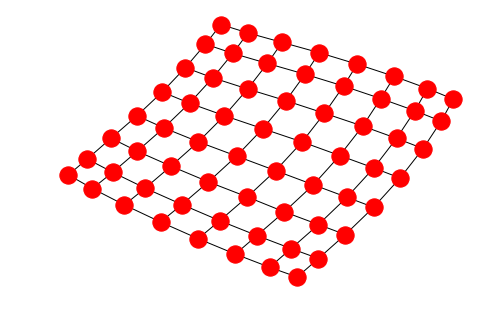

In [203]:
G = mesh()
nx.draw(G, with_labels=False)
AdjG = nx.adjacency_matrix(G)
H = nx.from_numpy_matrix(AdjG.todense())

task = np.arange(64)
print(AdjG.todense())
print(task)

In [96]:
df = pd.read_csv('traffic_rand.csv', header=None)
print(df.iloc[0:,0:])

          0         1         2         3         4         5         6   \
0   0.000000  0.760872  0.260858  0.852262  0.858803  0.742839  0.127934   
1   0.833058  0.000000  0.417977  0.213320  0.248002  0.544460  0.467143   
2   0.770118  0.772674  0.000000  0.720170  0.316438  0.501290  0.994121   
3   0.839729  0.677169  0.216852  0.000000  0.844499  0.247655  0.957857   
4   0.407197  0.564960  0.707621  0.492859  0.000000  0.431258  0.457209   
5   0.312286  0.800012  0.312840  0.221421  0.629532  0.000000  0.913562   
6   0.013485  0.899930  0.588318  0.709973  0.332236  0.706113  0.000000   
7   0.235446  0.806119  0.267591  0.612926  0.676726  0.358901  0.561871   
8   0.231882  0.087385  0.844709  0.233499  0.511082  0.769032  0.160827   
9   0.718121  0.758600  0.803798  0.355553  0.765442  0.381047  0.375288   
10  0.265814  0.493377  0.481332  0.911617  0.178254  0.404465  0.041257   
11  0.502683  0.865518  0.715600  0.234328  0.383019  0.106544  0.037917   
12  0.861591

In [207]:
def generate_mesh():
    
    connection=[]

    for i in range(63):

        if i in [56,57,58,59,60,61,62,63]:
            connection.append([i,i+1])

        elif i in [7,15,23,31,39,47,55]:
            connection.append([i,i+8])

        else:
            connection.append([i,i+1])
            connection.append([i,i+8])

    s=(64,64)

    mesh=np.zeros(s)

    for connect in connection:

            mesh[connect[0]][connect[1]]=1
            mesh[connect[1]][connect[0]]=1

    return mesh

In [98]:
def shortest_path(source, destination):
    sh = nx.shortest_path_length(G,source=source,target=destination)
    return sh

print(shortest_path(1,11))

3


In [147]:
def Taskswap( pos1, pos2, list): 
    list_copy=deepcopy(list)
    list_copy[pos1], list_copy[pos2] = list_copy[pos2], list_copy[pos1] 
    return list_copy

task1 = Taskswap(2,3,task)
print(task1)
print(task)

[ 0  1  3  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [148]:
def link_move(core1,core2,Scurr,Tcurr):
    Scurr_copy=deepcopy(Scurr)
    core_connect=[]
    coreCount=-1
    nLinks=np.sum(Scurr_copy[core2])
    if nLinks < 7:
        for i in Scurr_copy[core1]:
            coreCount+=1
            if i==1:
                core_connect.append(coreCount)
        core_link_destroy=random.choice(core_connect)
        if np.sum(Scurr[core_link_destroy]) == 1:
            neighbor(Scurr,Tcurr)
            
        else:
            #print("Core_link_destroy",core_link_destroy)
            Scurr_copy[core1][core_link_destroy]=0
            Scurr_copy[core_link_destroy][core1]=0
            Scurr_copy[core1][core2]=1
            Scurr_copy[core2][core1]=1                
    else:
        neighbor(Scurr,Tcurr)
    return Scurr_copy

In [149]:
def dijkstrapath(Scurr):
    Scurr1 = np.where(Scurr == 0, 1, 0)
    euclidean=np.array(euclidean_matrix())
    g=nx.from_numpy_matrix(Scurr,create_using=nx.DiGraph())
    s = (64,64)
    hop = np.zeros(s)
    ll = np.zeros(s)
    for i in range(64):
        for j in range(64):
            hop[i][j] = nx.shortest_path_length(g,i,j)
    g=nx.from_numpy_matrix(Scurr,create_using=nx.DiGraph())
    for ii in range(64):
        for jj in range(64):
            path = nx.dijkstra_path(g, ii,jj )
            path_len = len(path)
            
            length = 0
            for i in range(0,path_len-1):
                length = length + euclidean[path[i]][path[i+1]]
                ll[ii][jj]=length
    return hop,ll

In [150]:
def euclidean_matrix():
    s = (64,64)
    aj = np.zeros(s)
    for i in range(64):
        source_x = (int)(i / 8)
        source_y = i % 8
        #print("source_x,source_y",source_x,source_y)
        for j in range(64):
            x = (int)(j / 8)
            y = j % 8
            #print("x,y",x,y)
            aj[i][j] = (((x-source_x)**2) + ((y-source_y)**2))**0.5
    return aj

In [151]:
def acceptance_probability(old, new, T):
    a = abs(old - new)
    ap = mat.exp(-a/T)
    return ap

In [180]:
def neighbor(state,temp):
    link_or_tile = random.randint(0,1)
    core1_i=random.randint(0,7)
    core1_j=random.randint(0,7)
    core1=get_core(core1_i,core1_j)
    core2_i,core2_j=core_link(core1_i,core1_j)
    core2=get_core(core2_i,core2_j)
    Snew = deepcopy(state)
    Tnew = deepcopy(temp)
    if (Scurr[core1][core2]==1 or core1==core2):
        #print("Yes")
        neighbor(state,temp)
    else:
        if link_or_tile==0:
            Snew=link_move(core1,core2,state,temp)
        elif link_or_tile==1:
            Tnew=tile_swap(core1,core2,temp)
    return Snew,Tnew

In [153]:
def core_link(row,col):
    Max_rowLimit = row + 4
    Min_rowLimit = row - 4
    if Max_rowLimit > 7:
        Max_rowLimit = 7
    if Min_rowLimit < 0:
        Min_rowLimit = 0
    i = random.randint(Min_rowLimit,Max_rowLimit)
    if row < i:
        nSteps = i - row
    if row > i:
        nSteps = row - i
    if row==i:
        nSteps = 0
    if nSteps==4:
        return (i,col)
    else:
        if nSteps==0:
            Max_colLimit=col+4
            Min_colLimit=col-4
            if Max_colLimit > 7:
                Max_colLimit = 7
            if Min_colLimit < 0:
                Min_colLimit = 0
            j = random.randint(Min_colLimit,Max_colLimit)
        if nSteps==1:
            Max_colLimit=col+3
            Min_colLimit=col-3
            if Max_colLimit > 7:
                Max_colLimit = 7
            if Min_colLimit < 0:
                Min_colLimit = 0
            j = random.randint(Min_colLimit,Max_colLimit)
        if nSteps==2:
            Max_colLimit=col+2
            Min_colLimit=col-2
            if Max_colLimit > 7:
                Max_colLimit = 7
            if Min_colLimit < 0:
                Min_colLimit = 0
            j = random.randint(Min_colLimit,Max_colLimit)
        if nSteps==3:
            Max_colLimit=col+1
            Min_colLimit=col-1
            if Max_colLimit > 7:
                Max_colLimit = 7
            if Min_colLimit < 0:
                Min_colLimit = 0
            j = random.randint(Min_colLimit,Max_colLimit)
        return (i,j)

In [154]:
def neighbor(Scurr,Tcurr):
    link_or_tile = random.randint(0,1)
    #print("link or tile",link_or_tile)
    core1_i=random.randint(0,7)
    core1_j=random.randint(0,7)
    core1=get_core(core1_i,core1_j)
    core2_i,core2_j=core_link(core1_i,core1_j)
    core2=get_core(core2_i,core2_j)
    Snew = deepcopy(Scurr)
    Tnew = deepcopy(Tcurr)
    if (Scurr[core1][core2]==1 or core1==core2):
        neighbor(Scurr,Tcurr)
    else:
        if link_or_tile==0:
            Snew=link_move(core1,core2,Scurr,Tcurr)
        elif link_or_tile==1:
            Tnew=Taskswap(core1,core2,Tcurr)
    return Snew,Tnew

In [204]:
def get_core(i,j):
    rowCore=[0,8,16,24,32,40,48,56]
    start=rowCore[i]
    core=start+j
    
    return core

In [182]:
def costfunction(link_matrix,task_matrix,traffic):
    costVector=[]
    hop_count,length = dijkstrapath(link_matrix)
    for i in range(64):
        for j in range(64):
            task = task_matrix[j]
            cost=((3*hop_count[i][j] + length[i][j]) * traffic[task][i])
            costVector.append(cost)
            costFinal=np.sum(costVector)
    return costFinal

In [206]:
def SA(link,task,traffic):

    oldcost = cost(link,task,traffic)
    T = 100.0
    T_min = 0.01
    alpha = 0.9

    while T > T_min:
        i = 1
        while i <= 100:
            new_link,new_task = neighbor(link,task)
            newcost = costfunction(new_link,new_task,traffic)
            ap = acceptance_probability(oldcost, newcost, T)

            if newcost < oldcost:
                link = new_link
                task = new_task
                oldcost = newcost

            elif ap > random.random():
                link = new_link
                task = new_task
                oldcost = newcost
            i += 1

        T = T*alpha
        print("Temp",T,"cost",oldcost)

    return link,task,oldcost
    
def main(traffic):
    
    start = time.time()
    
    base_link = generate_mesh()
    base_task = [i for i in range(64)]
    
    Link,Task,cost = SA(base_link,base_task,traffic)
    
    G = nx.from_numpy_matrix(Link, create_using=nx.DiGraph())
    coordinates = [(x,y) for x in range(8) for y in range(8)]
    
    nx.draw(G,pos=coordinates)
    print("\nTask Placement\n",Task,"\nCost = ",cost)
    Stop = time.time()
    print("\n Time = ",Stop - start)
    print("Link placement \n")

In [165]:
traffic_uni = pd.read_csv('./traffic_uniform.csv',header=None)
complementarytraffic = pd.read_csv('./traffic_complement.csv',header=None)
randomtraffic = pd.read_csv('./traffic_rand.csv',header=None)

# Simulated Anealing on UNIFORM traffic

Temp 90.0 cost 29205.079727957447
Temp 81.0 cost 28388.387275981673
Temp 72.9 cost 28266.4666855935
Temp 65.61000000000001 cost 27755.84172653396
Temp 59.049000000000014 cost 26966.767210896804
Temp 53.144100000000016 cost 26622.772902139666
Temp 47.829690000000014 cost 26141.452839859987
Temp 43.04672100000001 cost 26083.68692982068
Temp 38.742048900000015 cost 25936.24157425836
Temp 34.86784401000001 cost 25956.702274069972
Temp 31.381059609000012 cost 25736.785422622772
Temp 28.242953648100013 cost 25635.130392939063
Temp 25.41865828329001 cost 25557.193423247776
Temp 22.87679245496101 cost 25457.85373856503
Temp 20.58911320946491 cost 25506.67236240409
Temp 18.53020188851842 cost 25330.5004962885
Temp 16.67718169966658 cost 25265.592549051165
Temp 15.009463529699921 cost 25259.49255841145
Temp 13.50851717672993 cost 25188.90374125537
Temp 12.157665459056936 cost 25123.501391887115
Temp 10.941898913151244 cost 25088.655488160875
Temp 9.847709021836119 cost 25052.024901532095
Temp 8.

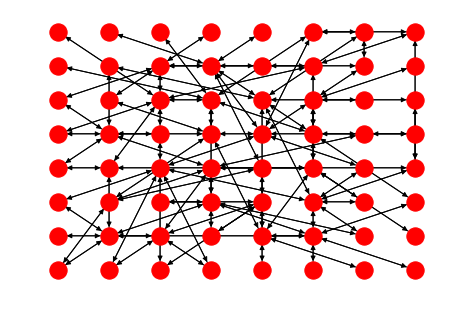

In [160]:
main(traffic_uni)

# Simulated Anealing on Complementary Traffic

Temp 90.0 cost 8275.556580826717
Temp 81.0 cost 8019.902541095338
Temp 72.9 cost 7978.43342811941
Temp 65.61000000000001 cost 8055.187062087863
Temp 59.049000000000014 cost 8190.579943582355
Temp 53.144100000000016 cost 8068.447162093207
Temp 47.829690000000014 cost 8134.960353083912
Temp 43.04672100000001 cost 8299.036380333722
Temp 38.742048900000015 cost 8370.85539867735
Temp 34.86784401000001 cost 8287.970164713024
Temp 31.381059609000012 cost 8018.487627506098
Temp 28.242953648100013 cost 7956.513429701505
Temp 25.41865828329001 cost 7912.849561116
Temp 22.87679245496101 cost 8063.4163023511355
Temp 20.58911320946491 cost 7866.218810573722
Temp 18.53020188851842 cost 7789.2251566203695
Temp 16.67718169966658 cost 7699.495711793535
Temp 15.009463529699921 cost 7765.688481775644
Temp 13.50851717672993 cost 7670.820166210905
Temp 12.157665459056936 cost 7443.41039564976
Temp 10.941898913151244 cost 7463.56666857677
Temp 9.847709021836119 cost 7387.723192911886
Temp 8.862938119652506 

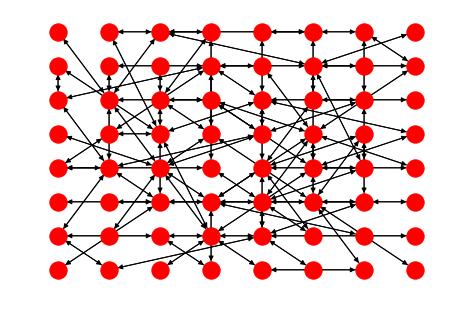

In [166]:
main(complementarytraffic)

# Simulated Anealing on RANDOM traffic

Temp 90.0 cost 35404.96984758333
Temp 81.0 cost 34396.06515322552
Temp 72.9 cost 33822.45169509142
Temp 65.61000000000001 cost 33754.43191099396
Temp 59.049000000000014 cost 33612.61649918731
Temp 53.144100000000016 cost 33373.87016161517
Temp 47.829690000000014 cost 32943.322850501805
Temp 43.04672100000001 cost 33170.21598612273
Temp 38.742048900000015 cost 32522.007664813784
Temp 34.86784401000001 cost 32551.78647419817
Temp 31.381059609000012 cost 32437.631902412377
Temp 28.242953648100013 cost 32280.298154587625
Temp 25.41865828329001 cost 32139.855020112023
Temp 22.87679245496101 cost 32153.379581492576
Temp 20.58911320946491 cost 32203.15040874677
Temp 18.53020188851842 cost 32105.36925717019
Temp 16.67718169966658 cost 31695.544211618093
Temp 15.009463529699921 cost 31626.368459258018
Temp 13.50851717672993 cost 31620.72481840809
Temp 12.157665459056936 cost 31390.554314509613
Temp 10.941898913151244 cost 31311.506880546574
Temp 9.847709021836119 cost 31163.706970366304
Temp 8.

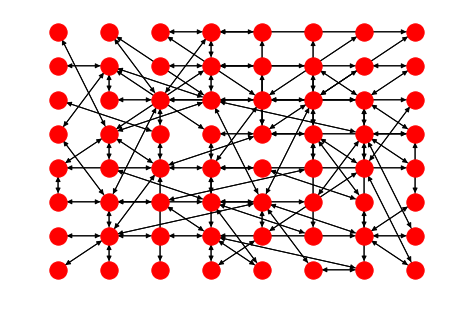

In [167]:
main(randomtraffic)

In [185]:
from sklearn.ensemble import RandomForestRegressor
import collections
def stage(euclidean,traffic,Iter,countRepeat,memA,memB,state,temp,core):
    
    
    nNodes=64
    grid=8

    cost_queue=collections.deque(maxlen=countRepeat)
    predict_queue=collections.deque(maxlen=countRepeat)

    cost_queue.clear()
    predict_queue.clear()

    training_data=[]

    for i in range(Iter):
        Sneigh,Tneigh = neighbor(state,temp)
        Cneigh=cost(Sneigh,Tneigh,traffic)
        
        if Cneigh < core:
            state=Sneigh
            temp=Tneigh
            core=Cneigh
        current_feature=[]
        features=[]
        up_tril=state[np.triu_indices(nNodes, k = 1)]
        input_features=[up_tril,temp]
        features=[x for y in input_features for x in y]
        
        for i in features:
            current_feature.append(i)
        memA.append(current_feature)
        training_data.append(current_feature)        
        cost_queue.append(core)
        
        if len(cost_queue)==countRepeat:
            cost_val=cost_queue[0]
            min_costVal=cost_val-100
            max_costVal=cost_val+100
            count=0
            
            for i in range(len(cost_queue)):
                if (min_costVal < cost_queue[i]) and (max_costVal > cost_queue[i]):
                    count=count+1
            if count==countRepeat:
                core = cost_queue[countRepeat-1]
                break
                
    # Train the regressor with the training data
    xTrain=np.array(memA)
    len_training=len(training)
    labels = [core]*len_training
    for i in labels:
        memB.append(i)
    yTrain = memB
    regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
    regressor.fit(xTrain, yTrain)  
    Pcurr=core
    
    for i in range(Iter):
        training_Sneigh=[]
        current_feature1=[]
        features1=[]   
        Sneigh,Tneigh = neighbor(state,temp)
        up_tril1=Sneigh[np.triu_indices(nNodes, k = 1)]
        input_features1=[up_tril1,Tneigh]
        features1=[x for y in input_features1 for x in y]
        
        for i in features1:
            current_feature1.append(i)
        training_Sneigh.append(current_feature1)
        Pneigh = regressor.predict(training_Sneigh)  
        
        # Minimize the regressors evaluation function
        if Pneigh < Pcurr:
            state=Sneigh
            temp=Tneigh
            Pcurr=Pneigh
        predict_queue.append(Pcurr)
        
        # Stopping condition if the prediction values do not change for given number of repeats
        if len(predict_queue)==countRepeat:
            predict_val=predict_queue[0]
            min_predictVal=predict_val-100
            max_predictVal=predict_val+100
            countP=0
            
            for i in range(len(predict_queue)):
                if (min_predictVal < predict_queue[i]) and (max_predictVal > predict_queue[i]):
                    countP=countP+1
                    
            if countP==countRepeat:
                Pcurr = predict_queue[countRepeat-1]
                break
                
    return state,temp,core,memA,memB

In [186]:
def callStage(traffic,iter,rpttime):
    
    start=time.time()
    memA=[]
    memB=[]
    cost_queue1=collections.deque(maxlen=rpttime)
    cost_queue1.clear()
    
    nNodes=64
    grid=8

    # get the euclidean distance matrix
    EuclideanDistance=euclidean_matrix() 
    euclidean=np.array(EuclideanDistance)  

    # Base Condition is mesh
    state=generate_mesh()
    temp=[i for i in range(64)]
    currentcost=cost(state,temp,traffic)
    print("Cost function for Mesh",currentcost)
    
    for i in range(iter):
        # memA and memB is appended for each iteration with the previous data and the last design 
        # is fed as base to the new design
        state,temp,currentcost,memA,memB=stage(euclidean,traffic,iter,rpttime,memA,memB,state,temp,currentcost)
        # stopping condition for Stage
        print("Cost Value after Stage",currentcost)
        cost_queue1.append(currentcost)
        if len(cost_queue1)==rpttime:
            cost_val=cost_queue1[0]
            min_costVal=cost_val-100
            max_costVal=cost_val+100
            count=0
            for i in range(len(cost_queue1)):
                if (min_costVal < cost_queue1[i]) and (max_costVal > cost_queue1[i]):
                    count=count+1
            if count==rpttime:
                currentcost = cost_queue1[rpttime-1]
                break 
                
    end=time.time()
    print("Total Execution Time:",end-start)
    
    return state,temp,currentcost

# STAGE on UNIFORM TRAFFIC

Cost function for Mesh 34384.451593398655
Cost Value after Stage 31275.23834868156
Cost Value after Stage 29688.15853391018
Cost Value after Stage 28568.808745391805
Cost Value after Stage 28568.808745391805
Cost Value after Stage 28216.577333604888
Cost Value after Stage 27846.26418047693
Cost Value after Stage 27737.0521120172
Cost Value after Stage 27394.212211665224
Cost Value after Stage 27297.18922189042
Cost Value after Stage 26810.10916708023
Cost Value after Stage 26769.38409536447
Cost Value after Stage 26753.121194804207
Cost Value after Stage 26610.951926349862
Cost Value after Stage 26433.431843003662
Cost Value after Stage 26402.968858851455
Cost Value after Stage 26193.245092901696
Cost Value after Stage 26151.91277472648
Cost Value after Stage 26053.94146069033
Cost Value after Stage 25991.723630221994
Cost Value after Stage 25943.925559750427
Cost Value after Stage 25909.357111192487
Total Execution Time: 864.5182223320007

Task Placement Matrix
 [25, 49, 56, 35, 26, 1

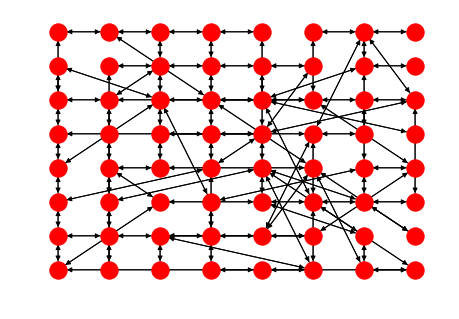

In [175]:
Link,Task,Cost=callStage(traffic_uni,21,50)
print("\nTask Placement Matrix\n",Task,"\nCost = ",Cost)
print("\nLink placement \n")
G = nx.from_numpy_matrix(Link, create_using=nx.DiGraph())
coordinates = [(x,y) for x in range(8) for y in range(8)]
nx.draw(G,pos=coordinates)

# STAGE on RANDOM traffic

Cost function for Mesh 43422.86699857061
Cost Value after Stage 33410.14598599317
Cost Value after Stage 33025.2232512683
Cost Value after Stage 32040.416567940243
Cost Value after Stage 31709.318634200237
Cost Value after Stage 31517.48552564734
Cost Value after Stage 31426.777673018318
Cost Value after Stage 31172.81601380167
Cost Value after Stage 31172.81601380167
Cost Value after Stage 31172.81601380167
Cost Value after Stage 31172.81601380167
Cost Value after Stage 31172.81601380167
Cost Value after Stage 31172.81601380167
Cost Value after Stage 31172.81601380167
Cost Value after Stage 31172.81601380167
Cost Value after Stage 31172.81601380167
Cost Value after Stage 31172.81601380167
Cost Value after Stage 31172.81601380167
Cost Value after Stage 31116.179853558064
Cost Value after Stage 31005.350492450892
Cost Value after Stage 31005.350492450892
Cost Value after Stage 31005.350492450892
Cost Value after Stage 31005.350492450892
Cost Value after Stage 31005.350492450892
Cost Val

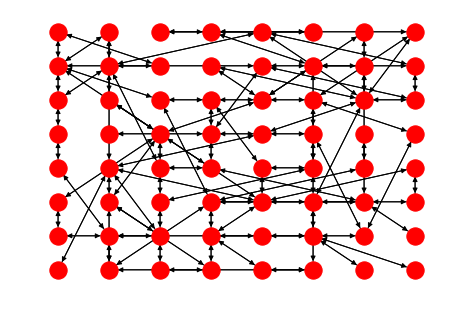

In [176]:
Link,Task,Cost=callStage(randomtraffic,200,50)
print("\nTask Placement Matrix\n",Task,"\nCost = ",Cost)
print("\nLink placement \n")
G = nx.from_numpy_matrix(Link, create_using=nx.DiGraph())
coordinates = [(x,y) for x in range(8) for y in range(8)]
nx.draw(G,pos=coordinates)

# STAGE on COMPLEMENTARY traffic

Cost function for Mesh 10052.9357927789
Cost Value after Stage 9362.799258783276
Cost Value after Stage 8680.70542521503
Cost Value after Stage 8552.712219304896
Cost Value after Stage 8254.455955649893
Cost Value after Stage 8217.992118150938
Cost Value after Stage 8153.661520574469
Cost Value after Stage 7947.800262335594
Cost Value after Stage 7820.604585450015
Cost Value after Stage 7709.363745184945
Cost Value after Stage 7618.648700929378
Cost Value after Stage 7606.894653068588
Cost Value after Stage 7567.389127713991
Cost Value after Stage 7523.68858827427
Cost Value after Stage 7509.321181260493
Cost Value after Stage 7464.054246874087
Cost Value after Stage 7444.459248826211
Cost Value after Stage 7405.015643045878
Cost Value after Stage 7380.4922250397685
Cost Value after Stage 7373.735599449934
Cost Value after Stage 7373.735599449934
Cost Value after Stage 7373.735599449934
Total Execution Time: 506.4056787490845

Task Placement Matrix
 [25, 19, 40, 8, 34, 44, 6, 29, 46, 5

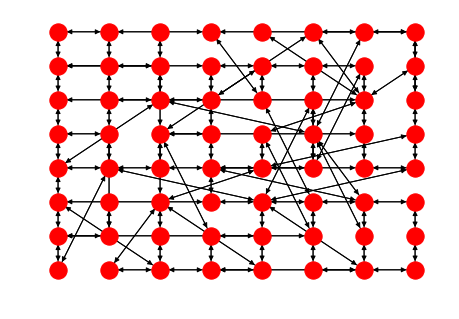

In [179]:
Link,Task,Cost=callStage(complementarytraffic,21,50)
print("\nTask Placement Matrix\n",Task,"\nCost = ",Cost)
print("\nLink placement \n")
G = nx.from_numpy_matrix(Link, create_using=nx.DiGraph())
coordinates = [(x,y) for x in range(8) for y in range(8)]
nx.draw(G,pos=coordinates)